General descriptive statistics analysis for normally distributed data.

# Contents
- [Data](#data)
- [Probability Density Function (PDF)](#pdf)
- [Cumulative Density Function (CDF)](#cdf)
- [Z-scores](#z_scr)
- [P-values](#p_val)
- [Hypothesis Testing](#hypo)
- [Interquartile Range](#iqr)
- [Confidence Interval](#ci)
- [Multivariate Distribution](#multi)

In [77]:
from IPython.display import Image
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [75]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Data <a name="data"></a>

## Generalized Data
Assumes mean = 0 and standard deviation = 1

In [2]:
# range of values for generalized normal distribution
norm_range = np.linspace(-5, 5, 100)

## Example Data
Generate example data

In [3]:
# population mean height
hgt_avg = 150
# population height standard deviation
hgt_std = 20
# number of samples
hgt_num = 5000

In [4]:
# generate sample data based on population mean and standard deviation
np.random.seed(0)
sample = np.random.normal(loc=hgt_avg, scale=hgt_std, size=hgt_num)

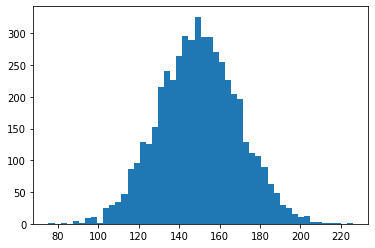

In [5]:
# histogram of sample data
plt.hist(sample, bins=50);

In [6]:
# sample mean
smpl_avg = np.average(sample)
smpl_avg

149.70547905948433

### Standard Deviation Equation:

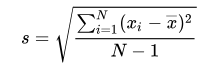

In [7]:
Image(filename='img/std_eqn.png')

In [8]:
# sample standard deviation
smpl_std = np.std(sample)
smpl_std

19.706736395606587

In [9]:
# minimum sample value
smpl_min = min(sample)
smpl_min

75.19798724096442

In [10]:
# maximum sample value
smpl_max = max(sample)
smpl_max

226.0332042993423

In [11]:
# uniform range based on sample values for calcs and plotting
x = np.linspace(smpl_min, smpl_max, 1000)

# Probability Density Function (PDF) <a name="pdf"></a>

## PDF Equation:

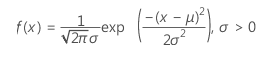

In [12]:
Image(filename='img/pdf.png')

## General

In [13]:
# normal pdf values
norm_pdf = st.norm.pdf(norm_range)

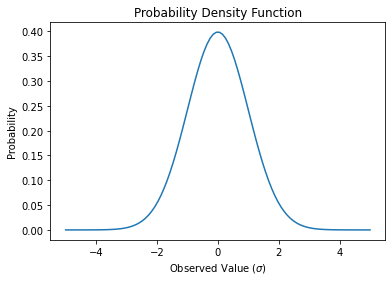

In [14]:
# plot general pdf
plt.plot(norm_range, norm_pdf)
plt.title('Probability Density Function')
plt.xlabel('Observed Value ($\sigma$)')
plt.ylabel('Probability');

## Example

In [15]:
# calculate normal pdf values based on sample data
y_pdf = st.norm.pdf(x, loc=smpl_avg, scale=smpl_std)

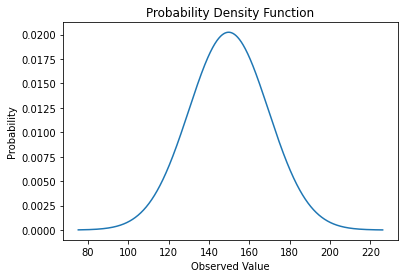

In [16]:
# plot pdf for example data
plt.plot(x, y_pdf)
plt.title('Probability Density Function')
plt.xlabel('Observed Value')
plt.ylabel('Probability');

# Cumulative Density Function (CDF) <a name="cdf"></a>

## CDF Equation:

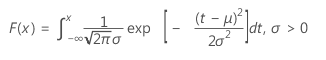

In [17]:
Image(filename='img/cdf.png')

## General

In [18]:
# normal cdf values
norm_cdf = st.norm.cdf(norm_range)

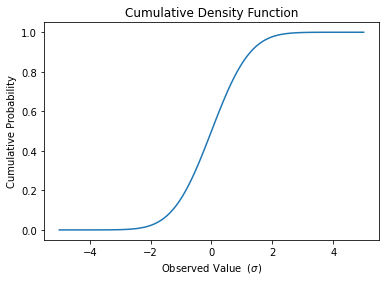

In [19]:
# plot general cdf
plt.plot(norm_range, norm_cdf)
plt.title('Cumulative Density Function')
plt.xlabel('Observed Value  ($\sigma$)')
plt.ylabel('Cumulative Probability');

## Example

In [20]:
# calculate normal cdf values based on sample data
y_cdf = st.norm.cdf(x, loc=smpl_avg, scale=smpl_std)

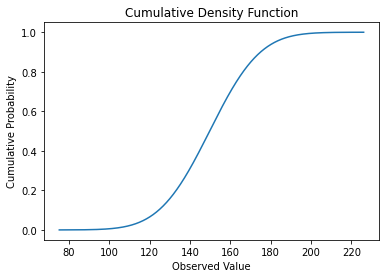

In [21]:
# plot cdf for sample data
plt.plot(x, y_cdf)
plt.title('Cumulative Density Function')
plt.xlabel('Observed Value')
plt.ylabel('Cumulative Probability');

# Z-scores <a name="z_scr"></a>
Percent Point Function (PPF) for locating thresholds for probability range

## Z-score Equation:

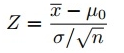

In [22]:
Image(filename='img/zscr.png')

In [23]:
# probability range
p_range = 0.95

In [24]:
# upper limit probability
up_lim = 1- (1 - p_range) / 2
up_lim

0.975

In [25]:
# lower limit probability
low_lim = (1 - p_range) / 2
low_lim

0.025000000000000022

## General

In [26]:
# z-score for upper limit
norm_z_up = st.norm.ppf(up_lim)
norm_z_up

1.959963984540054

In [27]:
# z-score for lower limit
norm_z_low = st.norm.ppf(low_lim)
norm_z_low

-1.959963984540054

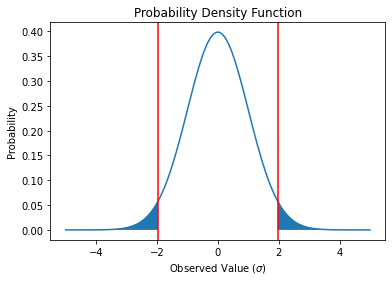

In [28]:
# general pdf plot with probability less and greater than z-score limits
plt.plot(norm_range, norm_pdf)
plt.axvline(norm_z_up, c='r')
plt.axvline(norm_z_low, c='r')
plt.fill_between(norm_range, 0, norm_pdf, where=(norm_range >= norm_z_up) | (norm_range <= norm_z_low))
plt.title('Probability Density Function')
plt.xlabel('Observed Value ($\sigma$)')
plt.ylabel('Probability');

## Example

In [29]:
# upper limit
t_up = st.norm.ppf(up_lim, loc=smpl_avg, scale=smpl_std)
t_up

188.32997264769793

In [30]:
# lower limit
t_low = st.norm.ppf(low_lim, loc=smpl_avg, scale=smpl_std)
t_low

111.08098547127074

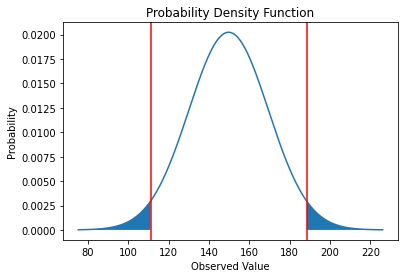

In [31]:
# pdf plot with probability less and greater than sample data limits
plt.plot(x, y_pdf)
plt.axvline(t_up, c='r')
plt.axvline(t_low, c='r')
plt.fill_between(x, 0, y_pdf, where=(x >= t_up) | (x <= t_low))
plt.title('Probability Density Function')
plt.xlabel('Observed Value')
plt.ylabel('Probability');

# P-Values <a name="p_val"></a>
Calculate probability of a given value based on data distribution

## Example

In [32]:
# value of interest
height = 170

In [33]:
# cumulative value for value of interest
cum_prob = st.norm.cdf(height, loc=smpl_avg, scale=smpl_std)
cum_prob

0.8484542894589899

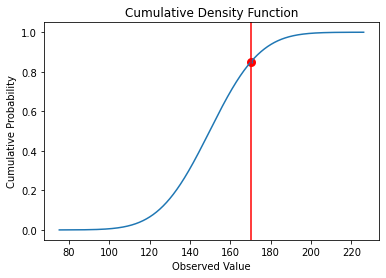

In [34]:
# cdf plot with value of interest
plt.plot(x, y_cdf)
plt.scatter(height, cum_prob, marker='o', edgecolors='r', linewidths=3)
plt.axvline(height, c='r')
plt.title('Cumulative Density Function')
plt.xlabel('Observed Value')
plt.ylabel('Cumulative Probability');

## Probability Less
Probability a random sample will be less than the value of interest

In [35]:
# p-value = probability less than value of interest
st.norm.cdf(height, loc=smpl_avg, scale=smpl_std)

0.8484542894589899

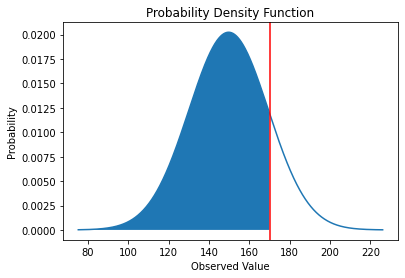

In [36]:
# pdf plot for probability less than value of interest
plt.plot(x, y_pdf)
plt.axvline(height, c='r')
plt.fill_between(x, 0, y_pdf, where=x <= height)
plt.title('Probability Density Function')
plt.xlabel('Observed Value')
plt.ylabel('Probability');

## Probability Greater
Probability a random sample will be greater than the value of interest

In [37]:
# p-value = probability greater than value of interest
1 - st.norm.cdf(height, loc=smpl_avg, scale=smpl_std)

0.15154571054101007

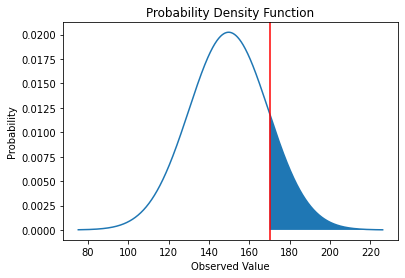

In [38]:
# pdf plot for probability greater than value of interest
plt.plot(x, y_pdf)
plt.axvline(height, c='r')
plt.fill_between(x, 0, y_pdf, where= x>= height)
plt.title('Probability Density Function')
plt.xlabel('Observed Value')
plt.ylabel('Probability');

# Hypothesis Testing <a name="hypo"></a>
Calculate probability of outcome given that the null hypothesis is true

In [39]:
# assumed population values for null hypothesis
pop_avg = 140
pop_std = 20

In [40]:
# significance level for hypothesis testing
alpha = 0.05

In [41]:
# mean from sample data
smpl_avg

149.70547905948433

Alternative hypothesis: mean value greater than null hypothesis value  
Sample mean is different from null hypothesis but is it statistically significant given our signficance level?

In [42]:
# calculate p-value
# probability of sample mean > null hypothesis, given null hypothesis is true
p_val = 1 - st.norm.cdf(smpl_avg, loc=pop_avg, scale=pop_std)
p_val

0.313741014711556

In [43]:
# check p-value against significance value
p_val < alpha

False

Calculated p-value for alternative hypothesis is not less than significance value so fail to reject null hypothesis

In [44]:
# z-score
z_scr = st.norm.ppf(1 - p_val)
z_scr

0.48527395297421655

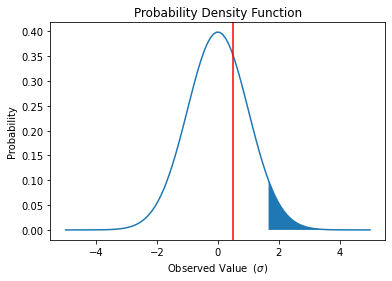

In [45]:
# general pdf plot for p-value
plt.plot(norm_range, norm_pdf)
plt.axvline(z_scr, c='r')
plt.fill_between(norm_range, 0, norm_pdf, where=(norm_range >= st.norm.ppf(1 - alpha)))
plt.title('Probability Density Function')
plt.xlabel('Observed Value  ($\sigma$)')
plt.ylabel('Probability');

Alternative hypothesis value is not beyond significance threshold

# Interquartile Range <a name="iqr"></a>

In [46]:
# interquartile range
st.iqr(sample)

26.848344357513042

In [47]:
# lower whisker
np.percentile(sample, 25) - 1.5 * st.iqr(sample)

95.88019127384052

In [48]:
# first quartile
np.percentile(sample, 25)

136.1527078101101

In [49]:
# second quartile (median value)
np.median(sample)

149.56218855065396

In [50]:
# third quartile
np.percentile(sample, 75)

163.00105216762313

In [51]:
# upper whisker
np.percentile(sample, 75) + 1.5 * st.iqr(sample)

203.2735687038927

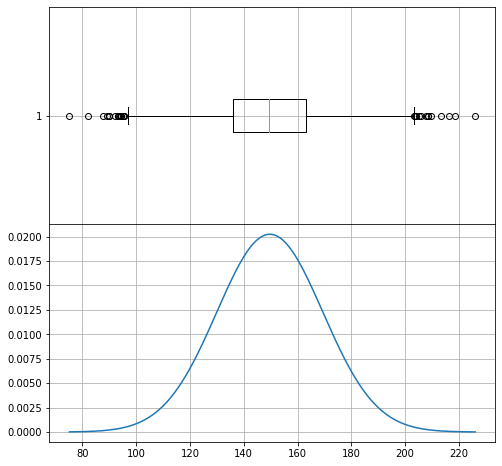

In [52]:
# interquartile and pdf plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), sharex=True)
ax1.boxplot(sample, vert=False)
ax1.grid()
ax2.plot(x, y_pdf)
ax2.grid()
fig.subplots_adjust(hspace=0.0)

# Confidence Interval <a name="ci"></a>

In [53]:
# confidence level
conf_lvl = 0.95

In [54]:
# confidence interval (lower and upper limits)
ci = st.norm.interval(conf_lvl, loc=smpl_avg, scale=smpl_std)
ci

(111.08098547127074, 188.32997264769793)

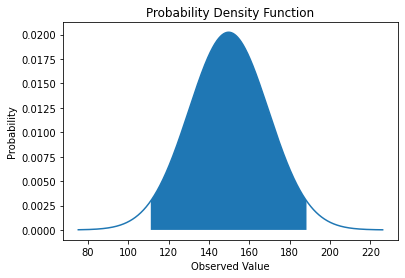

In [55]:
# confidence interval pdf plot
plt.plot(x, y_pdf)
plt.fill_between(x, 0, y_pdf, where=(x >= ci[0]) & (x <= ci[1]))
plt.title('Probability Density Function')
plt.xlabel('Observed Value')
plt.ylabel('Probability');

In [56]:
print('Based on sample data:')
print(f'With a {int(conf_lvl * 100)}% confidence level, \
the population mean is between {int(ci[0])} and {int(ci[1])}')

Based on sample data:
With a 95% confidence level, the population mean is between 111 and 188


# Multivariate Distribution <a name="multi"></a>

## Data

In [57]:
np.random.seed(0)
x1 = np.random.normal(100, 20, size=100)
np.random.seed(1)
x2 = np.random.normal(50, 15, size=100)

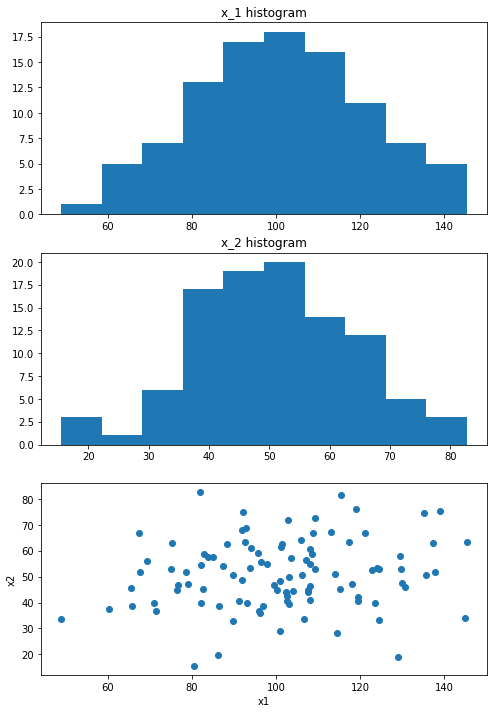

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
ax1.hist(x1)
ax1.set_title('x_1 histogram')
ax2.hist(x2)
ax2.set_title('x_2 histogram')
ax3.scatter(x1, x2)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2');

In [59]:
# calculate means
x1_avg = np.mean(x1)
x2_avg = np.mean(x2)

In [60]:
# calculate standard deviations
x1_std = np.std(x1)
x2_std = np.std(x2)

## Independent PDF

In [61]:
# uniform ranges based on sample values for calcs and plotting
x1_space = np.linspace(min(x1), max(x1), len(x1))
x2_space = np.linspace(min(x2), max(x2), len(x2))

In [62]:
# create mesh grid for pdf and plots
[X, Y] = np.meshgrid(x1_space, x2_space)

In [63]:
# calculate pdf for variables
p1_pdf = st.norm.pdf(X, loc=[x1_avg]*100, scale=[x1_std]*100)
p2_pdf = st.norm.pdf(Y, loc=[x2_avg]*100, scale=[x2_std]*100)
# calculate interaction pdf (assumes independence of variables)
p_pdf = p1_pdf * p2_pdf

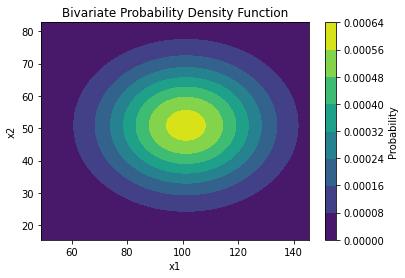

In [64]:
# 2-D PDF countour plot
plt.contourf(X, Y, p_pdf)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bivariate Probability Density Function')
cbar = plt.colorbar()
cbar.set_label('Probability');

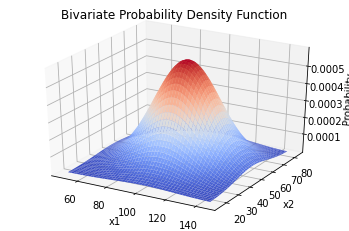

In [65]:
# 3-D PDF surface plot
# %matplotlib notebook
ax_3d = plt.axes(projection='3d')
ax_3d.plot_surface(X, Y, p_pdf, cmap=cm.coolwarm)
ax_3d.set_xlabel('x1')
ax_3d.set_ylabel('x2')
ax_3d.set_zlabel('Probability')
ax_3d.set_title('Bivariate Probability Density Function');

In [66]:
# %matplotlib inline

### Identify Outliers

In [67]:
# function to set limits
def stds(p_range):
    # upper and lower percentage limits
    low_lim = (1 - p_range)/2
    up_lim = 1 - low_lim
    # output number of standard deviations for percentage limits
    return(st.norm.ppf(up_lim) + abs(st.norm.ppf(low_lim)))

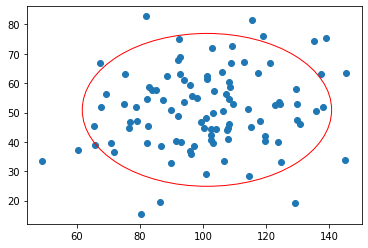

In [68]:
ax = plt.subplot()
el = Ellipse(xy=(x1_avg, x2_avg), width=stds(p_range)*x1_std, height=stds(p_range)*x2_std, color='r', fc='None')
ax.add_artist(el)
plt.scatter(x1, x2);

In [69]:
# function to identify points outside limits
def outside_el(x, y, h, k, a, b):
    '''
    x: x-coordinates
    y: y-coordinates
    h: center x-coordinate
    k: center y-coordinate
    a: x-axis radius
    b: y-axis radius
    '''
    
    out_idx = (x - h)**2/a**2 + (y - k)**2/b**2 > 1
    return(x[out_idx], y[out_idx])

In [70]:
x1_out, x2_out = outside_el(x1, x2, x1_avg, x2_avg, stds(0.95)/2 * x1_std, stds(0.95)/2 * x2_std)

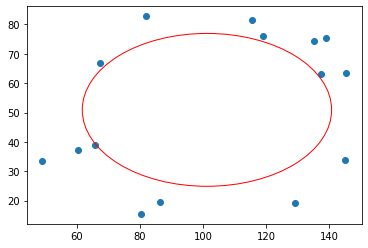

In [71]:
ax = plt.subplot()
el = Ellipse(xy=(x1_avg, x2_avg), width=stds(p_range)*x1_std, height=stds(p_range)*x2_std, color='r', fc='None')
ax.add_artist(el)
plt.scatter(x1_out, x2_out);

## Dependent PDF

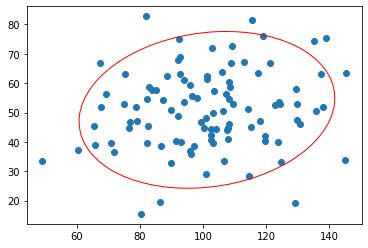

In [81]:
fig, ax = plt.subplots()
ax.scatter(x1, x2)
confidence_ellipse(x1, x2, ax, n_std=2, edgecolor='red');

### Covariance Equation:

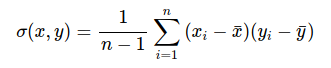

In [72]:
Image(filename='img/cov_eqn.png')

In [68]:
# calculate covariance of data
cov = np.cov([x1, x2])
cov

array([[410.43499766,  40.38796213],
       [ 40.38796213, 178.06852793]])

In [69]:
X = np.vstack((x1, x2)).T

### PDF Equation:

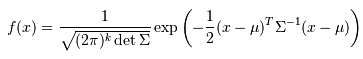

In [9]:
Image(filename='img/multinorm_eqn.png')

In [70]:
# multivariate pdf
st.multivariate_normal.pdf(X, mean = [x1_avg, x2_avg], cov=cov)

array([4.53009508e-05, 4.03662892e-04, 2.85036304e-04, 1.59370958e-05,
       9.83538979e-05, 1.43391989e-05, 8.27156499e-05, 3.87618912e-04,
       5.58731376e-04, 5.16655653e-04, 1.70100997e-04, 7.48061965e-06,
       4.04970360e-04, 5.20556570e-04, 2.81843377e-04, 2.27628016e-04,
       1.94838643e-04, 3.39443158e-04, 5.76082603e-04, 3.03619862e-04,
       1.38716511e-05, 2.60635763e-04, 3.06198344e-04, 3.58661204e-04,
       4.53166804e-05, 1.60712612e-04, 5.82781520e-04, 3.17048226e-04,
       1.73484334e-04, 2.14570816e-04, 4.06227290e-04, 4.82444968e-04,
       2.99022821e-04, 6.01625733e-05, 4.07841998e-04, 5.89877554e-04,
       9.71291724e-05, 3.15045351e-04, 9.14382574e-05, 3.96208167e-04,
       3.24801003e-04, 1.41839229e-04, 1.05103634e-04, 3.02484169e-05,
       5.06984808e-04, 4.07531294e-04, 2.42381539e-04, 4.01395170e-05,
       1.44579247e-04, 4.57724899e-04, 3.50197774e-04, 4.94165485e-04,
       2.23186359e-04, 2.70415690e-04, 5.68193690e-04, 4.80868279e-04,
      